In [51]:
import pandas as pd

ground_truth_df = pd.read_csv('ground_truth.csv', index_col=0)
ground_truth_df.columns = ['findSigExposures',	'best_columns',	'Sample Names',	'Cancer Types']
ground_truth_df.head()


,findSigExposures,best_columns,Sample Names,Cancer Types
0,0.092256,0,SP95550,Uterus-AdenoCA
1,0.063790,1,SP95550,Uterus-AdenoCA
2,0.158236,4,SP95550,Uterus-AdenoCA
3,0.099229,16,SP95550,Uterus-AdenoCA
4,0.586489,44,SP95550,Uterus-AdenoCA


In [61]:
experiment_df = pd.read_csv('experiment.csv', index_col=0)
experiment_df.columns = ['findSigExposures',	'best_columns',	'Sample Names',	'Cancer Types']
experiment_df.head()

,findSigExposures,best_columns,Sample Names,Cancer Types
0,0.092292,0,SP95550,Uterus-AdenoCA
1,0.063734,1,SP95550,Uterus-AdenoCA
2,0.158121,4,SP95550,Uterus-AdenoCA
3,0.099349,16,SP95550,Uterus-AdenoCA
4,0.586503,44,SP95550,Uterus-AdenoCA


In [77]:
experiment_sig_profiler_df = pd.read_csv('experiment_sig_profiles.csv', index_col=0)
experiment_sig_profiler_df.columns = ['findSigExposures',	'best_columns',	'Sample Names',	'Cancer Types']
experiment_sig_profiler_df.head()

,findSigExposures,best_columns,Sample Names,Cancer Types
0,0.092292,0,SP95550,Uterus-AdenoCA
1,0.063844,1,SP95550,Uterus-AdenoCA
2,0.158231,4,SP95550,Uterus-AdenoCA
3,0.099239,16,SP95550,Uterus-AdenoCA
4,0.586393,44,SP95550,Uterus-AdenoCA


In [78]:
def calculate_metrics(predicted, actual, total_values):
    predicted_set = set(predicted)
    actual_set = set(actual)
    all_values_set = set(range(total_values))

    true_positives = len(predicted_set.intersection(actual_set))
    true_negatives = len(all_values_set.difference(actual_set).difference(predicted_set))

    false_negatives = actual_set.difference(predicted_set)
    false_positives = predicted_set.difference(actual_set)

    total_positives = len(actual_set)
    total_negatives = total_values - total_positives

    sensitivity = true_positives / total_positives if total_positives else 0
    specificity = true_negatives / total_negatives if total_negatives else 0

    return sensitivity, specificity, false_negatives, false_positives


In [80]:
import pandas as pd

results = []
total_values = 67

for patient in ground_truth_df['Sample Names'].unique():
    actual = ground_truth_df.groupby('Sample Names').get_group(patient)['best_columns'].tolist()
    predicted = experiment_df.groupby('Sample Names').get_group(patient)['best_columns'].tolist()
    predicted_sig_profile = experiment_sig_profiler_df.groupby('Sample Names').get_group(patient)['best_columns'].tolist()

    sensitivity, specificity, false_negatives, false_positives = calculate_metrics(predicted, actual, total_values)
    sensitivity_sig_profile, specificity_sig_profile, false_negatives_sig_profile, false_positives_sig_profile = calculate_metrics(predicted_sig_profile, actual, total_values)

    results.append({
        'Pacjent': patient,
        'Sensitivity_our': sensitivity,
        'Specificity_our': specificity,
        'Sensitivity_sig_profile':sensitivity_sig_profile,
        'Specificity_sig_profile':specificity_sig_profile,
        'false_negatives_our':  {} if len(false_negatives) == 0 else false_negatives,
        'false_positives_our': {} if len(false_positives) == 0 else false_positives,
        'false_negatives_sig_profile':  {} if len(false_negatives_sig_profile) == 0 else false_negatives_sig_profile,
        'false_positives_sig_profile': {} if len(false_positives_sig_profile) == 0 else false_positives_sig_profile
    })

# Tworzenie DataFrame z wynikami
results_df = pd.DataFrame(results)


In [109]:
results_df['Sensitivity_our'].mean(), results_df['Sensitivity_sig_profile'].mean()

(0.9895570001203803, 0.9892133427344695)

In [114]:
results_df['Specificity_our'].mean(), results_df['Specificity_sig_profile'].mean()

(0.9963588941345553, 0.9963030565293524)

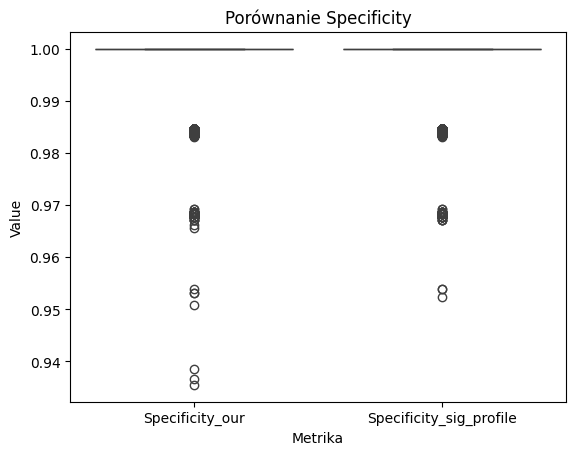

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Przekształcenie DataFrame
melted_df = results_df.melt(value_vars=['Specificity_our', 'Specificity_sig_profile'], var_name='Metric', value_name='Value')

# Tworzenie wykresu violin plot
sns.boxplot(x='Metric', y='Value', data=melted_df)

# Dodanie tytułu i etykiet
plt.title('Porównanie Specificity')
plt.xlabel('Metrika')
plt.ylabel('Value')

# Wyświetlenie wykresu
plt.show()


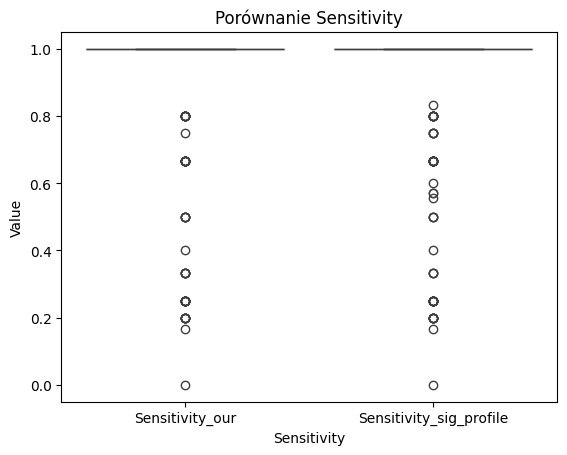

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Przekształcenie DataFrame
melted_df = results_df.melt(value_vars=['Sensitivity_our', 'Sensitivity_sig_profile'], var_name='Metric', value_name='Value')

# Tworzenie wykresu violin plot
sns.boxplot(x='Metric', y='Value', data=melted_df)

# Dodanie tytułu i etykiet
plt.title('Porównanie Sensitivity')
plt.xlabel('Sensitivity')
plt.ylabel('Value')

# Wyświetlenie wykresu
plt.show()


In [100]:
import pandas as pd

signatures_false_negatives_our, signatures_false_positives_our = [], []
signatures_false_negatives_sig_profile, signatures_false_positives_sig_profile = [], []

for idx, row in results_df.iterrows():
    for item in row['false_negatives_our']:
      signatures_false_negatives_our.append({'Pacjent': row['Pacjent'], 'signature_false_negatives_our': item})
    for item in row['false_positives_our']:
      signatures_false_positives_our.append({'Pacjent': row['Pacjent'], 'signature_false_positives_our': item})
    
    for item in row['false_negatives_sig_profile']:
      signatures_false_negatives_sig_profile.append({'Pacjent': row['Pacjent'], 'signature_false_negatives_sig_profile': item})
    for item in row['false_positives_sig_profile']:
      signatures_false_positives_sig_profile.append({'Pacjent': row['Pacjent'], 'signature_false_positives_sig_profile': item})

# Teraz możesz wykonać grupowanie na podstawie elementów
grouped_fn_our = pd.DataFrame(signatures_false_negatives_our).groupby('signature_false_negatives_our').count()
grouped_fp_our = pd.DataFrame(signatures_false_positives_our).groupby('signature_false_positives_our').count()
grouped_fn_sig_profile = pd.DataFrame(signatures_false_negatives_sig_profile).groupby('signature_false_negatives_sig_profile').count()
grouped_fp_sig_profile = pd.DataFrame(signatures_false_positives_sig_profile).groupby('signature_false_positives_sig_profile').count()

In [107]:
grouped_fp_sig_profile

,Pacjent
signature_false_positives_sig_profile,
0,288
1,28
2,1
4,185
6,1
8,1
15,1
16,99
19,2


In [108]:
grouped_fp_our

,Pacjent
signature_false_positives_our,
0,250
1,33
2,2
4,165
6,2
7,1
8,9
9,3
11,2


In [96]:
grouped_fp_sig_profile.sum()

Pacjent    649
dtype: int64

In [97]:
grouped_fp.sum()

Pacjent    638
dtype: int64

In [93]:
grouped_fn_sig_profile.sum()

Pacjent    131
dtype: int64

In [94]:
grouped_fn.sum()

Pacjent    119
dtype: int64

In [13]:
import pandas as pd 

SigProfilerAssignment = pd.read_csv('/home/amso/Documents/data_comparation/output/Assignment_Solution/Activities/Assignment_Solution_Activities.txt',sep='\t')

In [14]:
SigProfilerAssignment.head()

,Samples,SBS1,SBS2,SBS3,SBS4,SBS5,SBS6,SBS7a,SBS7b,SBS7c,...,SBS53,SBS54,SBS55,SBS56,SBS57,SBS58,SBS59,SBS60,SBS84,SBS85
0,SP117655,1496,1296,0,0,1819,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,SP117556,985,0,0,0,924,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,SP117627,1110,528,0,0,1452,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,SP117775,1803,1270,0,0,2204,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SP117332,442,461,0,0,834,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
pd.read_csv('data/M.csv', delimiter='\t')

,Unnamed: 0,SP117655,SP117556,SP117627,SP117775,SP117332,SP117712,SP117017,SP117031,SP117759,...,SP94540,SP95222,SP89389,SP90503,SP92460,SP92931,SP91265,SP89909,SP90629,SP95550
0,ACA,292,102,98,198,46,183,95,194,268,...,153,250,89,100,254,100,387,85,161,170
1,ACC,148,54,54,106,26,134,78,98,125,...,76,129,49,55,146,52,190,72,118,87
2,ACG,32,11,11,22,5,52,17,21,24,...,16,28,10,12,29,11,41,13,25,19
3,ACT,155,54,53,105,25,104,58,103,132,...,81,131,47,53,205,54,204,100,80,90
4,CCA,213,73,70,142,33,126,31,142,264,...,112,181,64,72,180,73,283,52,105,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,GTT,56,20,19,38,9,23,11,37,36,...,30,48,17,19,81,19,75,41,26,33
92,TTA,90,32,31,62,15,38,20,58,55,...,47,78,28,32,82,31,118,36,60,53
93,TTC,120,42,42,82,20,52,25,79,75,...,63,103,37,42,109,42,158,45,72,70
94,TTG,96,35,35,68,17,56,29,62,64,...,49,83,31,36,104,34,123,57,78,57


In [41]:
import pandas as pd
import numpy as np
from utils import save_to_dataframe

tumorBRCA = np.genfromtxt('data/M.csv', delimiter='\t', skip_header=1)
tumorBRCA = np.delete(tumorBRCA, 0, axis=1)

df = pd.read_csv('data/WGS-decomposition__PCAWG_sigProfiler_SBS_signatures_in_samples.csv')

ground_truth = SigProfilerAssignment.drop(columns=['Samples'])

ground_truth.columns = [x for x in range(0, 67)]
ground_truth_df = pd.DataFrame()

for i in range(tumorBRCA.shape[1]):
    first_col = tumorBRCA[:, i]
    patient = ground_truth.iloc[i]
    patient = patient / patient.sum()

    non_zero_condition = (patient != 0)
    indexes = non_zero_condition[non_zero_condition].index.tolist()

    r = save_to_dataframe(indexes, patient[indexes].to_numpy(), SigProfilerAssignment.iloc[i]['Samples'], df.iloc[i]['Cancer Types'])
    ground_truth_df = pd.concat([r, ground_truth_df], ignore_index=True)


ground_truth_df.to_csv('experiment_sig_profiles.csv')